# 3D Mean Transformation
Extracting useful information for 3D MRI scan to train efficient CNN models can be tricky. Why?
1. 3D CNN are difficult to train due to high computation times. And retraining models can be exhausting.
2. To train 3D CNN, amount of labelled-data required is very high and is not suitable if the sample size is small. 

To overcome these limitations, 2D CNNs are preferred over 3D CNNs as they are easier to train and comparatively, do not require large training dataset. However, training 2D CNNs can have it's own set of problems, such as:
1. How to convert 3D information into 2D? 
2. How to minimise the information loss during such transformations?

In this Jupyter notebook, we will be covering how to transform the 3D MRI into 2D using DWT Transformation.

In [1]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt
import pywt

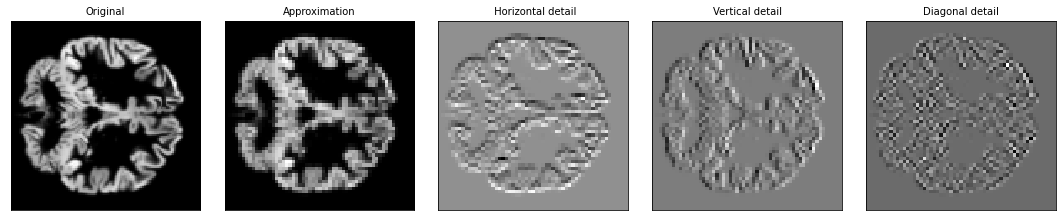

In [12]:
# Load an example MRI image (you should replace this with your own image loading code)
# For simplicity, we are using a synthetic example here
image_data = nb.load("/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii").get_fdata()  # Replace with your actual MRI image data
image_data = image_data[:,50,:]

# Apply DWT to the image
wavelet = 'db1'  # Choose a wavelet, e.g., 'db1' (Daubechies wavelet with one vanishing moment)
levels = 1      # Number of decomposition levels

coeffs = pywt.wavedec2(data = image_data, 
                      wavelet = wavelet, 
                      level = levels)
# LL, (LH, HL, HH) = coeffs

titles = ['Original','Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

fig = plt.figure(figsize=(15, 3))
for i, a in enumerate([image_data,coeffs[0], coeffs[1][0],coeffs[1][1],coeffs[1][2]]):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

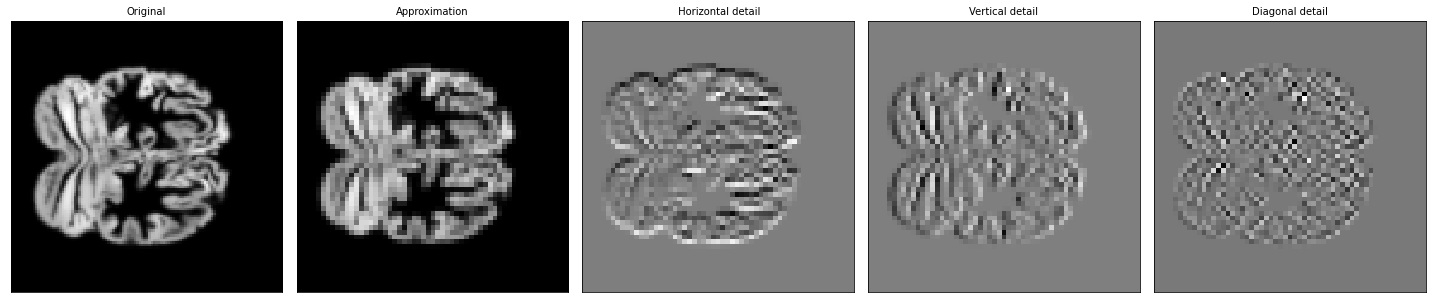

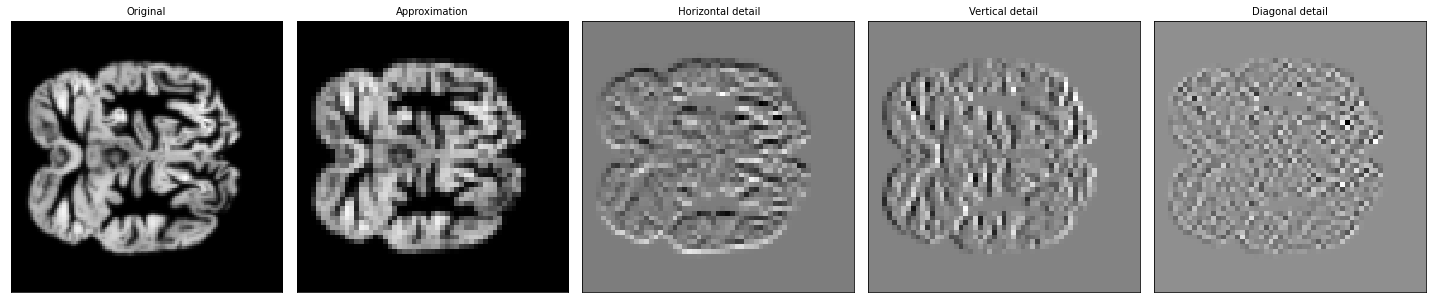

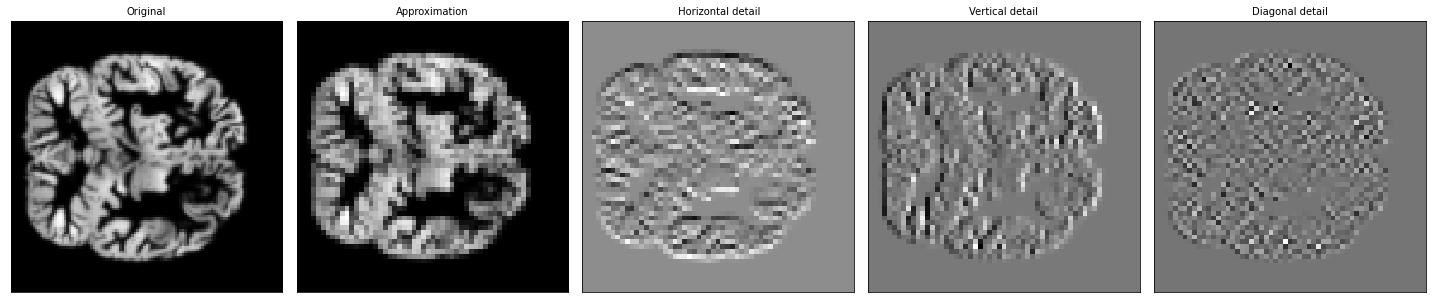

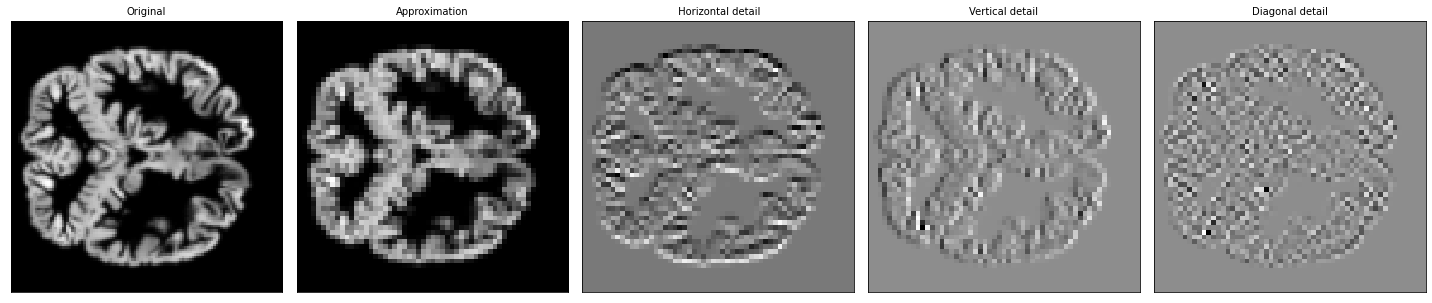

In [23]:
# Load an example MRI image (you should replace this with your own image loading code)
# For simplicity, we are using a synthetic example here
titles = ['Original','Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

for k in range(30,50,5):
    image_data = nb.load("/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii").get_fdata()  # Replace with your actual MRI image data
    image_data = image_data[:,k,:]
    coeffs = pywt.wavedec2(data = image_data, 
                      wavelet = 'db1',
                      level = 1)
    dwt_list = [image_data,coeffs[0], coeffs[1][0],coeffs[1][1],coeffs[1][2]]

    fig = plt.figure(figsize=(20, 120))
    for i, a in enumerate(dwt_list):
        ax = fig.add_subplot(4, len(dwt_list), i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    fig.tight_layout()
    plt.show()